In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor


Corrupted data in x:  8
Corrupted data in y:  7
Corrupted data in z:  20
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  

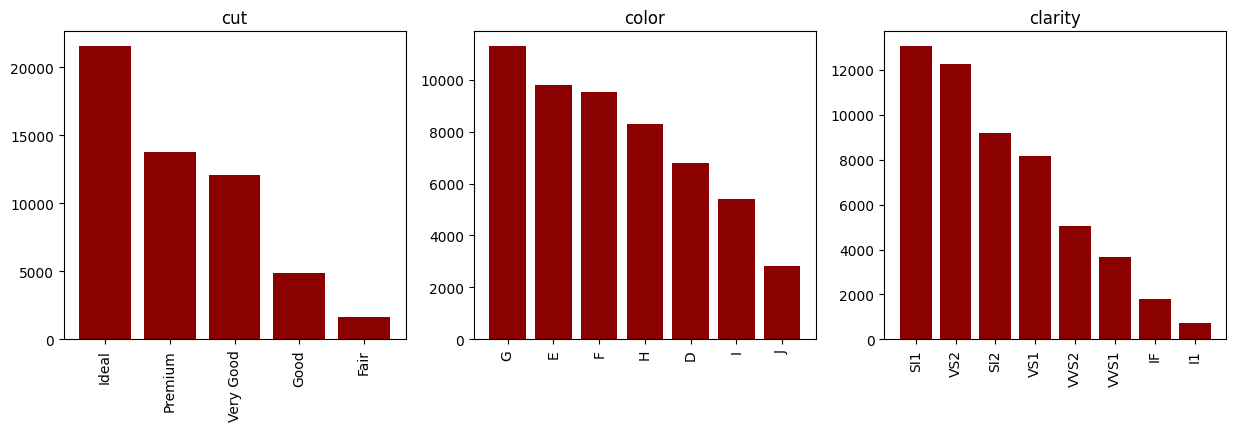

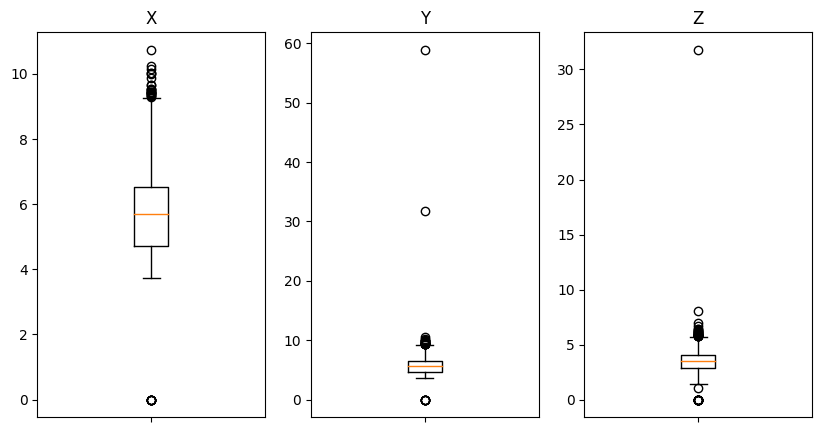

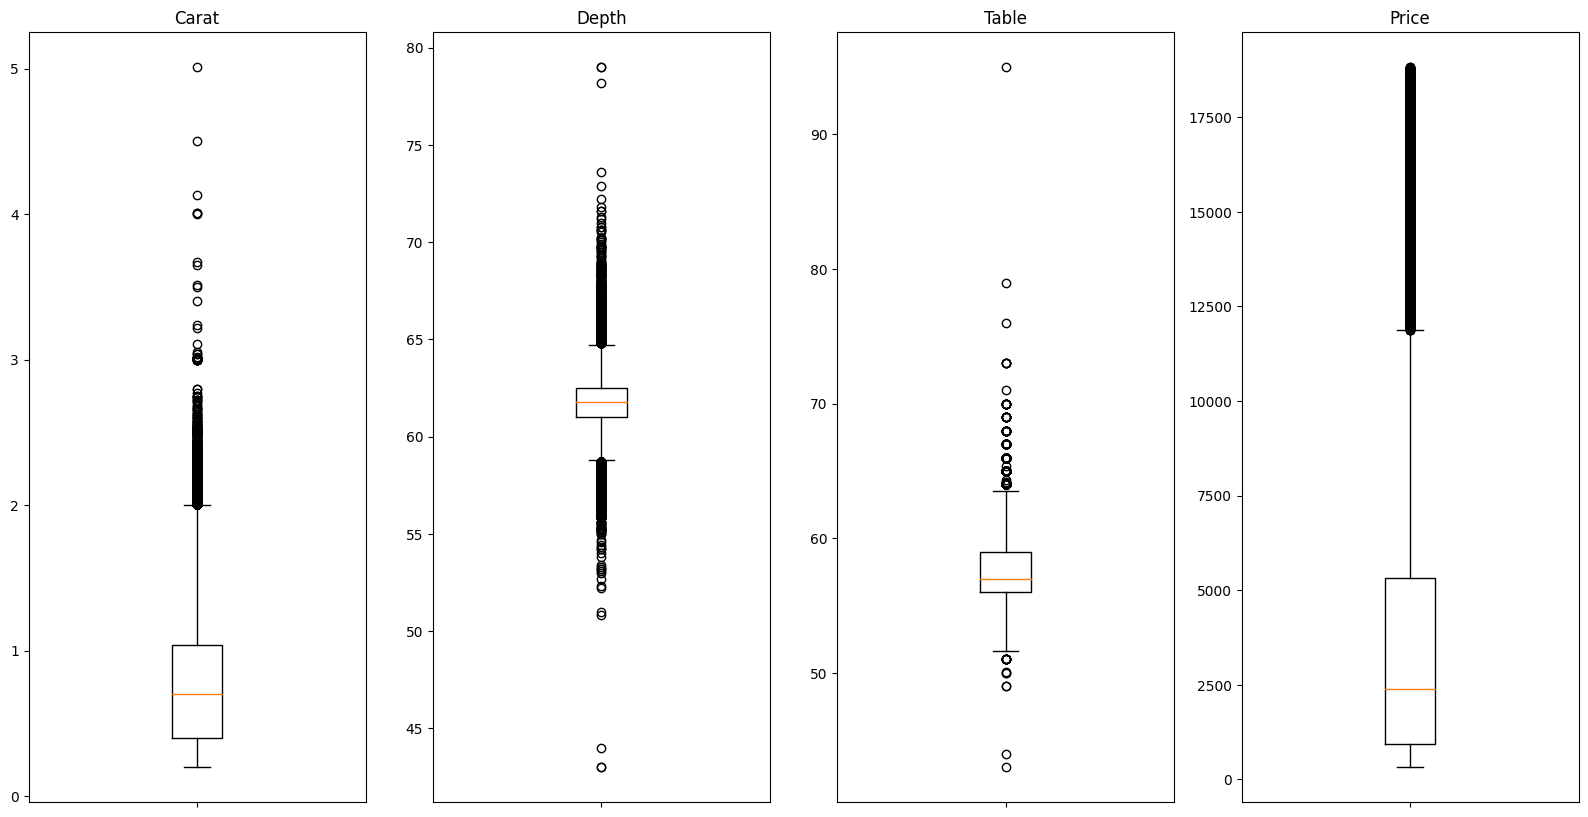

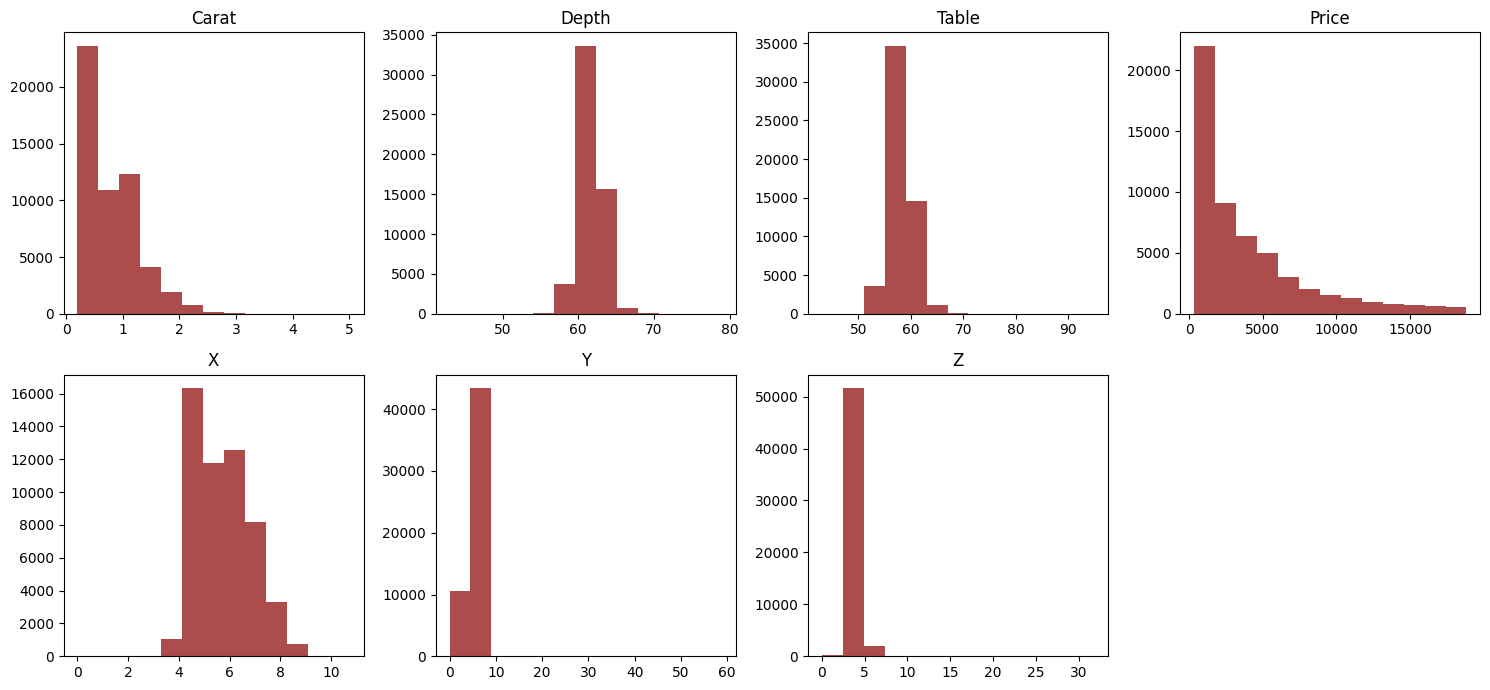

Carat: reject H0
Depth: reject H0
Table: reject H0
Price: reject H0
X: reject H0
Y: reject H0
Z: reject H0


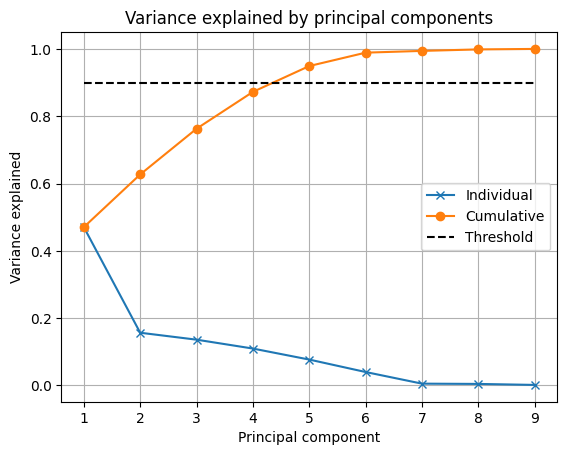

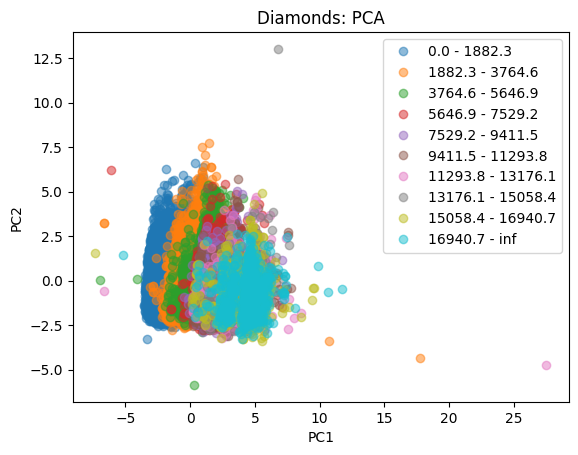

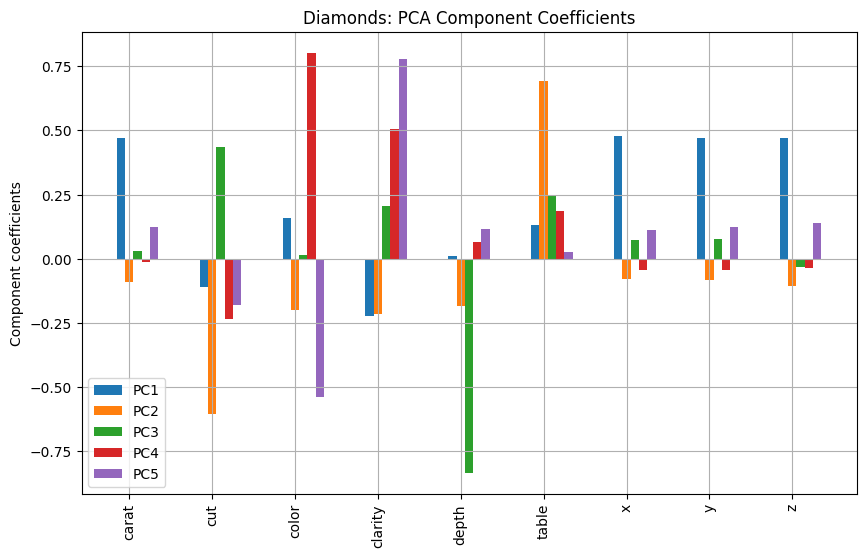

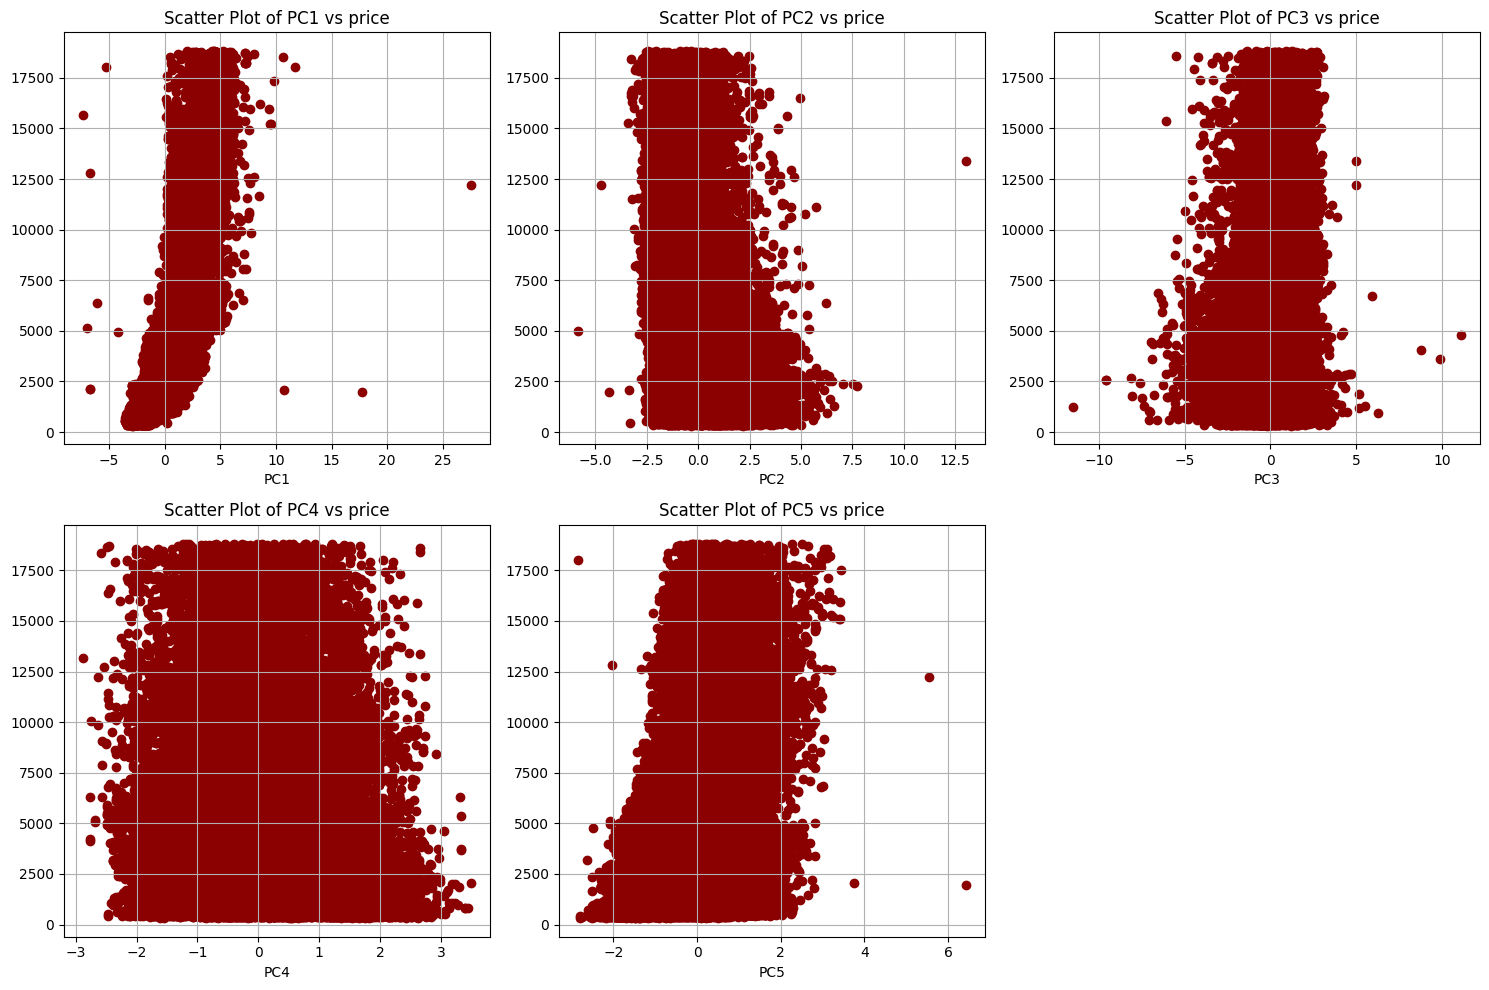

In [2]:
#Importing project 1 to retrieve X and y
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.y

# Project 2
# REGRESSION PART A (1)

In [4]:
#making sure data is standardized
print("Means of X columns", np.mean(X, axis=0))
print("SDs of X columns", np.std(X, axis=0))

Means of X columns [ 2.44487823e-16  1.45428102e-16 -1.33836007e-16 -8.11446654e-17
 -3.99690168e-15  9.69520678e-17  2.78210281e-16 -8.43061459e-17
 -2.00227096e-16]
SDs of X columns [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
#defining methods to calculate test and train error 

def test_error(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    test_error = (sum ([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_test, y_test)])) / len(y_test)
    return test_error

def train_error(model, X_train, y_train):
    y_pred_train = model.predict(X_train)
    train_error = (sum([(y_pred - y_true)**2 for y_pred, y_true in zip(y_pred_train, y_train)])) / len(y_train)
    return train_error

In [29]:
#REGRESSION PART A (1) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = train_error(model, X_train, y_train)
test_rmse = test_error(model, X_test, y_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)



print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

#printing weights
#print(model.coef_)

Train RMSE: 1475190.8687413973
Test RMSE: 1499636.6903304928
Train R^2 Score: 0.907335736316707
Test R^2 Score: 0.9056643685073493


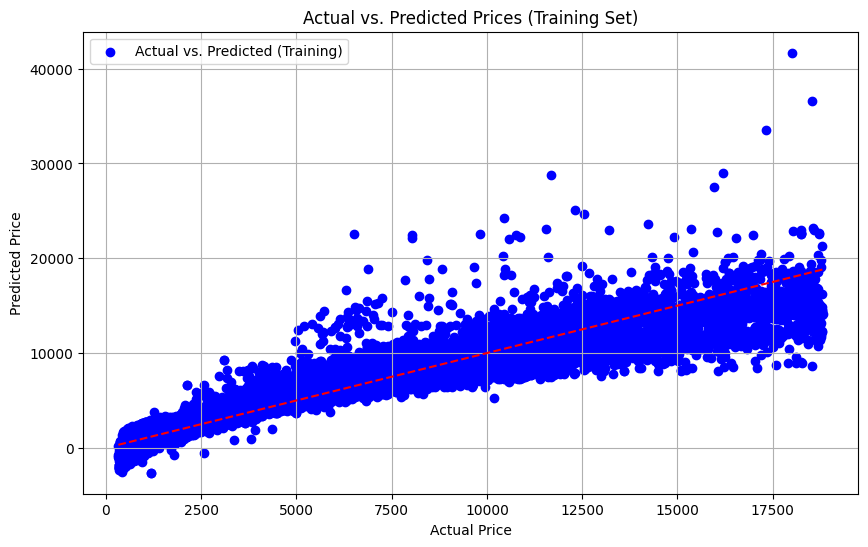

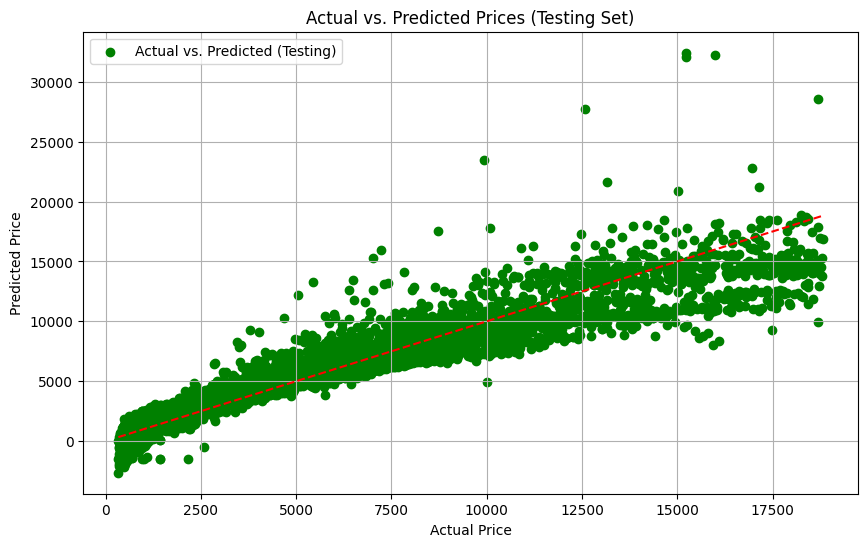

In [30]:
# Scatter plot for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Testing Set)')
plt.legend()
plt.grid(True)
plt.show()

## REGRESSION PART A (2)

In [32]:
#introducing a regularization parameter lambda, estimating generalization error and calculating test error

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

lambda_values = [0, 0.01, 1, 10, 20, 100, 30]
lambda_gen_errors = {}
lambda_train_errors = {}

for lmbda in lambda_values:
    lambda_gen_errors[lmbda] = []
    lambda_train_errors[lmbda] = []

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for lmbda in lambda_values:
        model = Ridge(alpha=lmbda)
        model.fit(X_train, y_train)
        lambda_gen_errors[lmbda].append(test_error(model, X_test, y_test))
        lambda_train_errors[lmbda].append(train_error(model, X_train, y_train))

# Get the coefficients (weights) for each feature
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (weights) for each feature:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i + 1}: {coef}")

print("Intercept:", intercept)
lambda_error_list = [(lmbda, sum(lambda_gen_errors[lmbda]) / 10) for lmbda in lambda_values]
lambda_train_error_list = [(lmbda, sum(lambda_train_errors[lmbda]) / 10) for lmbda in lambda_values]

Coefficients (weights) for each feature:
Feature 1: 5017.597229881697
Feature 2: 135.90238705296707
Feature 3: -543.5545136981932
Feature 4: 824.4221940910053
Feature 5: -95.88175833703839
Feature 6: -57.886708832555634
Feature 7: -964.4379572257789
Feature 8: 210.3040204477174
Feature 9: -128.85493673299675
Intercept: 3933.6080295551687


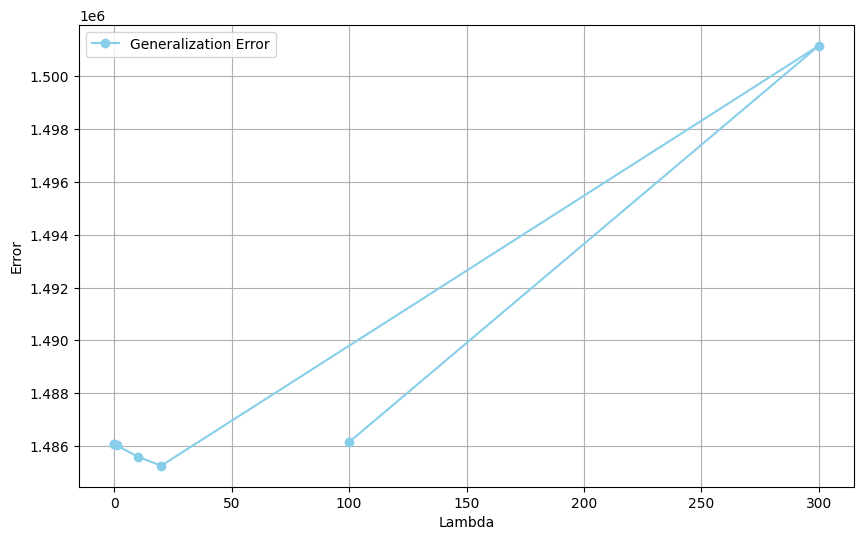

In [28]:
#plotting generalization error (and test error) as a function of lambda
#8.1.1

lambda_values_plot, errors = zip(*lambda_error_list)
_, train_errors = zip(*lambda_train_error_list)

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')

# Plot lambda values vs training errors
#plt.plot(lambda_values_plot, train_errors, 'o-', label='Training Error', color='orange')

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

# REGRESSION PART B (1)

First, define an artificial neural network

In [4]:
from sklearn.neural_network import MLPRegressor

def neural_network(h, X_train, y_train, X_test, y_test):
    ann_model = MLPRegressor(
            hidden_layer_sizes=(h,),
            max_iter=5000,  # Increase the number of iterations
            learning_rate_init=0.001,  # Adjust the learning rate
            solver='adam',  # Try different solvers
            early_stopping=True,  # Enable early stopping
            random_state=42
        )
    ann_model.fit(X_train, y_train)
    y_est = ann_model.predict(X_test)
    est_error = sum((y_est-y_test)**2)/len(y_est)

    return est_error

In [5]:
# Testing different h_values
from sklearn.model_selection import KFold 

h_values = [60, 70, 80]
df = pd.DataFrame(columns=['h', 'error'])

kf = KFold(n_splits=10, shuffle=True)
rows = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    for h in h_values:
        error = neural_network(h, X_train, y_train, X_test, y_test)
        rows.append({'h': h, 'error': error})

df = pd.DataFrame(rows)
            

In [6]:
#Printing results of mean errors of different amount of h units to choose optimal range
mean_errors = []
for h in h_values:
    filtered_rows = df[df['h'] == h]
    mean_error = filtered_rows['error'].mean()
    print(f'Mean error where h = {h}: {mean_error}')

Mean error where h = 60: 965462.719364437
Mean error where h = 70: 973734.97230228
Mean error where h = 80: 948662.9874687346


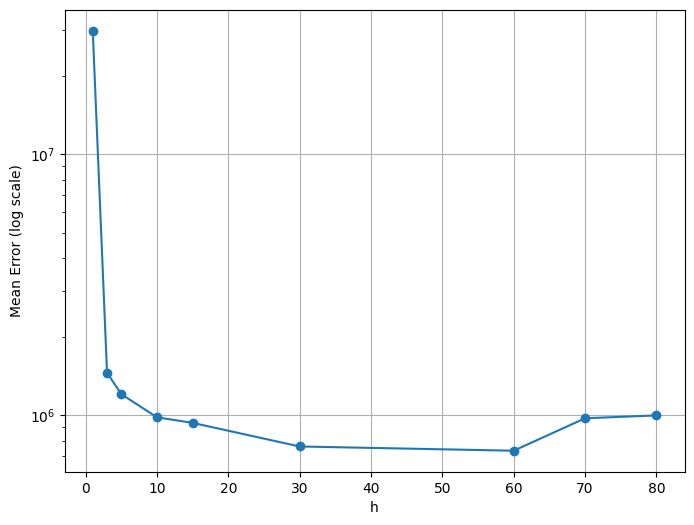

In [13]:
data = {
    'h': [1, 3, 5, 10, 15, 30, 60, 70, 80],
    'mean_error': [
        29785634.19869898,
        1455222.0636909069,
        1204864.8829694863,
        982155.736068495,
        934992.5681984939,
        759173.8176840226,
        731245.5823711553,
        973734.97230228,
        998662.9874687346
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.plot(df['h'], df['mean_error'], marker='o', linestyle='-')
plt.xlabel('h')
plt.ylabel('Mean Error (log scale)')
plt.grid(True)
# Set y-axis to logarithmic scale
plt.yscale('log')
plt.savefig('mean_error_h.png')
plt.show()

Mean error where h = 1: 29785634.19869898

Mean error where h = 3: 1455222.0636909069

Mean error where h = 5: 1204864.8829694863

Mean error where h = 10: 982155.736068495

Mean error where h = 15: 934992.5681984939

Mean error where h = 30: 759173.8176840226

Mean error where h = 60: 731245.5823711553

In [ ]:
data = {
    'h': [1, 3, 5, 10, 15, 30, 60, 70, 80],
    'mean_error': [
        29785634.19869898,
        1455222.0636909069,
        1204864.8829694863,
        982155.736068495,
        934992.5681984939,
        759173.8176840226,
        731245.5823711553,
        973734.97230228,
        948662.9874687346
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
plt.plot(df['h'], df['mean_error'], marker='o', linestyle='-')
plt.title('Mean Error vs. h')
plt.xlabel('h')
plt.ylabel('Mean Error')
plt.grid(True)
plt.savefig('mean_error_h.png')
plt.show()

As you can see, 60 gives thw smallest error on avarage


# REGRESSION PART B (2)

In [ ]:
#2-layer validation
K_outer = 10
K_inner = 10
rows = []


# Define the range of complexity-controlling parameters
lambda_values = [0, 0.1, 10, 30, 40, 50, 60, 100, 1000]
h_values = [1, 5, 15, 30, 60]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=11)
k_outer = 0

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]
    
    k_inner = 1
    
    y_train_outer = y_train_outer.reset_index(drop=True)
    y_test_outer = y_test_outer.reset_index(drop=True)
    
    lambda_in_errors = {lmbda: [] for lmbda in lambda_values} # Initialize dictionary to store errors for each lambda
    ann_in_errors = {h: [] for h in h_values}
    
    for train_inner_index, test_inner_index in inner_cv.split(X_train_outer):
        X_train_inner, X_test_inner = X_train_outer[train_inner_index], X_train_outer[test_inner_index]
        y_train_inner, y_test_inner = y_train_outer[train_inner_index], y_train_outer[test_inner_index]
        
        
        # Train ridge regression models with different lambda values on the inner training set
        for lmbda in lambda_values:
            ridge_model = Ridge(alpha=lmbda)
            ridge_model.fit(X_train_inner, y_train_inner)
            error = test_error(ridge_model, X_test_inner, y_test_inner)
            lambda_in_errors[lmbda].append(error)
        
        for h in h_values:
            error = neural_network(h, X_train_inner, y_train_inner, X_test_inner, y_test_inner)
            ann_in_errors[h].append(error)
        
        k_inner += 1
        #end of inner loop
    
    
    
    lambda_avg_errors = {lmbda: np.mean(errors) for lmbda, errors in lambda_in_errors.items()}
    best_lambda = min(lambda_avg_errors, key=lambda lmbda: lambda_avg_errors[lmbda])
    
    h_avg_errors = {h: np.mean(errors) for h, errors in ann_in_errors.items()}
    best_h = min(h_avg_errors, key=lambda h: h_avg_errors[h])
    
    
    ridge_model = Ridge(alpha=best_lambda)
    ridge_model.fit(X_train_outer, y_train_outer)
    ridge_error = test_error(ridge_model, X_test_outer, y_test_outer)
    
    
    nn_error = neural_network(best_h, X_train_outer, y_train_outer, X_test_outer, y_test_outer)
    
    # Baseline
    baseline_model = LinearRegression()
    baseline_model.fit(X_train_outer, y_train_outer)
    baseline_error = test_error(baseline_model, X_test_outer, y_test_outer)

    #print(f'Final errors of each fold {k_outer}:', error)
    k_outer += 1
    
    rows.append({'k_outer': k_outer, 'h': best_h, 'NN error': nn_error, 'lambda': best_lambda, 'ridge_error': ridge_error, 'baseline': baseline_error})
    
two_layer_results = pd.DataFrame(rows)

k_outer  lambda   ridge_error      baseline

    1      30  1.553238e+06  1.553685e+06
    
    2      30  1.445183e+06  1.445023e+06
    
    3     100  1.340935e+06  1.331517e+06
    
    4      30  1.536381e+06  1.534923e+06
    
    5      40  1.500460e+06  1.499625e+06
    
    6      30  1.647187e+06  1.651964e+06
    
    7      60  1.467367e+06  1.479242e+06
    
    8      30  1.534091e+06  1.532121e+06
    
    9      40  1.348850e+06  1.348794e+06
    
    10      30  1.463613e+06  1.462055e+06


In [18]:
#This is  data from running 2 layer cross validation (saving ith hard-coded, so we don't loose it)

data = {
    'k_outer': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'h': [60, 60, 60, 30, 60, 60, 60, 60, 60, 60],
    'NN error': [701341.659734, 471099.588991, 604797.464416, 759805.722564, 673026.793919, 716873.565070, 710772.105463, 601760.521201, 864380.715567, 484907.337029],
    'lambda': [30, 30, 100, 30, 40, 30, 60, 30, 40, 30],
    'ridge_error': [1.553238e+06, 1.445183e+06, 1.340935e+06, 1.536381e+06, 1.500460e+06, 1.647187e+06, 1.467367e+06, 1.534091e+06, 1.348850e+06, 1.463613e+06],
    'baseline_error': [1.553685e+06, 1.445023e+06, 1.331517e+06, 1.534923e+06, 1.499625e+06, 1.651964e+06, 1.479242e+06, 1.532121e+06, 1.348794e+06, 1.462055e+06]
}

# Create DataFrame
two_layer_table = pd.DataFrame(data)

# Display the DataFrame
print(two_layer_table)

   k_outer   h       NN error  lambda  ridge_error  baseline_error
0        1  60  701341.659734      30    1553238.0       1553685.0
1        2  60  471099.588991      30    1445183.0       1445023.0
2        3  60  604797.464416     100    1340935.0       1331517.0
3        4  30  759805.722564      30    1536381.0       1534923.0
4        5  60  673026.793919      40    1500460.0       1499625.0
5        6  60  716873.565070      30    1647187.0       1651964.0
6        7  60  710772.105463      60    1467367.0       1479242.0
7        8  60  601760.521201      30    1534091.0       1532121.0
8        9  60  864380.715567      40    1348850.0       1348794.0
9       10  60  484907.337029      30    1463613.0       1462055.0


## REGRESSION PART B (3)
setup 1. Paired t-test

H0 : Model MA and MB have the same performance, Z = 0

H1 : Model MA and MB have different performance, Z ̸= 0

In [19]:
import scipy.stats
import scipy.stats as st


In [20]:

def paired_test(zA, zB):
    # compute confidence interval of model A
    alpha = 0.05

    # Compute confidence interval of z = zA-zB and p-value of Null hypothesis
    z = zA - zB
    CI = st.t.interval(
        1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z)
    )  # Confidence interval
    p = 2 * st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)  # p-value
    return p,CI

In [21]:
print( "p-value of pair: NN and Ridge is", paired_test(two_layer_table['NN error'], 
                                                       two_layer_table['ridge_error'])[0], 
      "and CI is:", paired_test(two_layer_table['NN error'], two_layer_table['ridge_error'])[1])

p-value of pair: NN and Ridge is 2.9460062430836046e-08 and CI is: (-931512.5461484634, -718195.3590607366)


In [22]:
print( "p-value of pair: NN and Baseline is", paired_test(two_layer_table['NN error'], 
                                                       two_layer_table['baseline_error'])[0], 
      "and CI is:", paired_test(two_layer_table['NN error'], two_layer_table['baseline_error'])[1])

p-value of pair: NN and Baseline is 2.9775850391882096e-08 and CI is: (-931828.0398062908, -718208.665402909)


In [23]:
print( "p-value of pair: Ridge and Baseline is", paired_test(two_layer_table['ridge_error'], 
                                                       two_layer_table['baseline_error'])[0], 
      "and CI is:", paired_test(two_layer_table['ridge_error'], two_layer_table['baseline_error'])[1])

p-value of pair: Ridge and Baseline is 0.9252969401364426 and CI is: (-4021.3142205642075, 3692.5142205642073)


P-value is statistically significant in paired test Ridge and Baseline, therefore there is evidence to aprove null hypothesis in this case. In other cases null hypothesis is rejected

# Classification part 1

In [5]:
#Importing X, class labels and class names from Project 1
import project1_Alona_Gauri_Valeria
X = project1_Alona_Gauri_Valeria.X
y = project1_Alona_Gauri_Valeria.classLabels
classNames = project1_Alona_Gauri_Valeria.classNames
print("Count of each class", y.value_counts())
print("Price intervals as classes: ", classNames)

Count of each class 0    23328
1    10257
2     7852
3     4176
4     2498
5     1831
6     1344
7     1028
8      883
9      743
Name: price_category, dtype: int64
Price intervals as classes:  ['0.0 - 1882.3', '1882.3 - 3764.6', '3764.6 - 5646.9', '5646.9 - 7529.2', '7529.2 - 9411.5', '9411.5 - 11293.8', '11293.8 - 13176.1', '13176.1 - 15058.4', '15058.4 - 16940.7', '16940.7 - inf']


Three methods:

baseline

logistic regression

KNN k-nearest neighbor classification, complexity controlling parameter k = 1, 2 . . .


In [21]:
X_train
print(X_train)

StandardScaler()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing

import numpy as np
#Importing project 1 to retrieve X and y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train,X_test =(np.array(preprocessing.StandardScaler().fit(X_train)),np.array(preprocessing.StandardScaler().fit(X_test)))
print(type(X_train))

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Baseline Model
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
baseline_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline Accuracy:", baseline_accuracy)


<class 'numpy.ndarray'>
Baseline Accuracy: 0.4318687430478309
0.00018548552974368866


In [11]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

kf = KFold(n_splits=10, shuffle=True)

neighbors = [4,5,6,7,15]
k_gen_errors = {}


for k in neighbors:
    k_gen_errors[k] = []
    

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        test_error = knn.score(X_test, y_test)
        k_gen_errors[k].append(test_error)


neighbor_error_list = [(k, sum(k_gen_errors[k]) / 10) for k in neighbors]

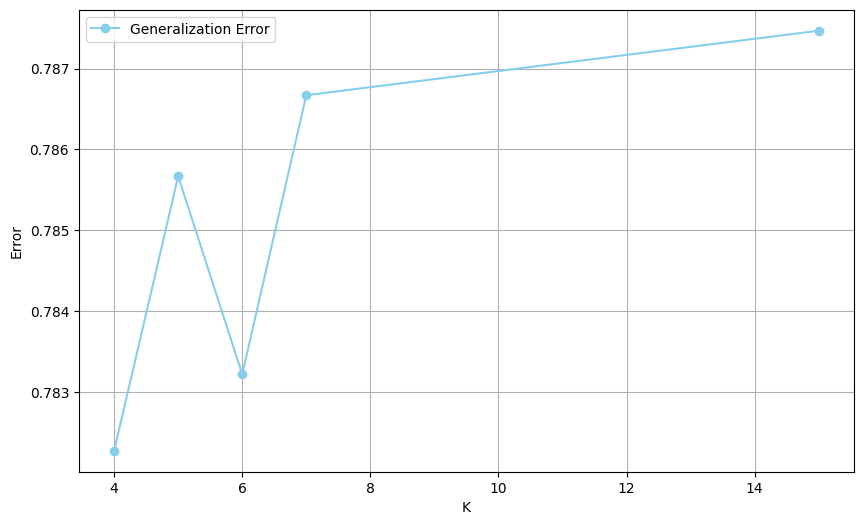

In [12]:
import matplotlib.pyplot as plt
k_values_plot, errors = zip(*neighbor_error_list)
_, 

# Plot lambda values vs generalization errors
plt.figure(figsize=(10, 6))
plt.plot(k_values_plot, errors, 'o-', label='Generalization Error', color='skyblue')


plt.xlabel('K')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
#1 layer Logistic with K_fold = 10, and many different lambdas
#1 layer Logistic with K_fold = 10, and many different lambdas

import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the values of lambda
lambda_values = [0.001, 0.01, 0.1, 1, 10]

# Perform 10-fold cross-validation
kf = KFold(n_splits=2, shuffle=True)

# Initialize an empty dictionary to store cross-validation results
lambda_results = {l: [] for l in lambda_values}

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for l in lambda_values:
        # Initialize logistic regression model with regularization parameter (lambda)
        logistic_model = LogisticRegression(C=1/l, max_iter=5000, solver='lbfgs', multi_class='multinomial', class_weight='balanced', random_state=0)
        
        # Train the model
        logistic_model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = logistic_model.predict(X_test)
        
        # Calculate accuracy and store the result
        error = 1-accuracy_score(y_test, y_pred)
        lambda_results[l].append(error)

# Calculate mean accuracy for each lambda value
mean_error = {l: np.mean(err) for l, err in lambda_results.items()}

# Print mean accuracy for each lambda value
for l, err in mean_error.items():
    print(f"Lambda = {l}: Mean Error = {err:.4f}")


Lambda = 0.001: Mean Error = 0.1778
Lambda = 0.01: Mean Error = 0.1776
Lambda = 0.1: Mean Error = 0.1782
Lambda = 1: Mean Error = 0.1793
Lambda = 10: Mean Error = 0.1875


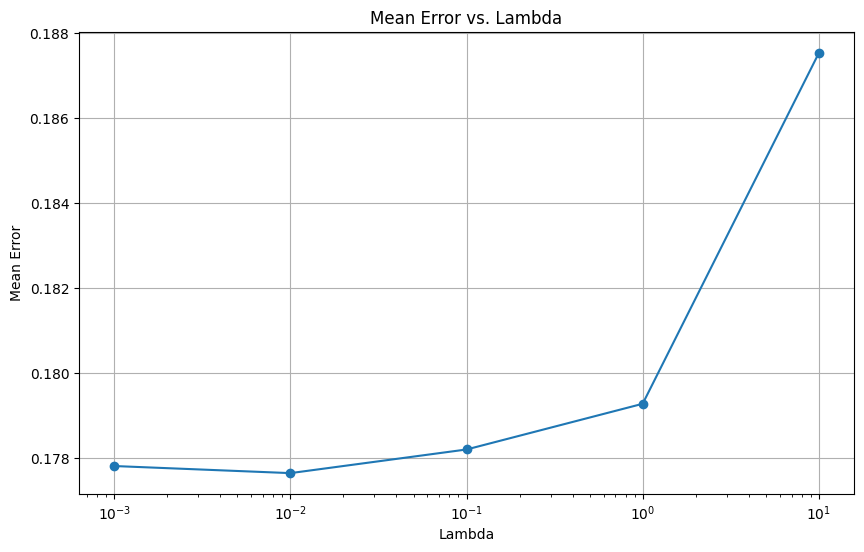

In [10]:
import matplotlib.pyplot as plt

# Extract lambda values and mean errors
lambda_values = list(mean_error.keys())
mean_errors = list(mean_error.values())

# Plot lambda values vs. mean errors
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, mean_errors, marker='o', linestyle='-')
plt.xlabel('Lambda')
plt.ylabel('Mean Error')
plt.title('Mean Error vs. Lambda')
plt.xscale('log')  # Set logarithmic scale for better visualization
plt.grid(True)
plt.show()

In [15]:
#2-fold cross validation
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Define the range of complexity-controlling parameters
lambda_values = [0.001, 0.01, 0.1, 1, 10] #put instead relevan ones
K_values = [2, 4, 6, 5, 10]

# Initialize the KFold instances for two-level cross-validation
outer_cv = KFold(n_splits=K_outer, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=K_inner, shuffle=True, random_state=11)
k_outer = 0
rows = []

# Initialize lists to store predictions and true labels for statistical evaluation
all_y_true = []
all_y_pred_logistic = []
all_y_pred_knn = []
all_y_pred_baseline = []

lr_error_list=[]
knn_error_list=[]
baseline_error_list=[]

# Outer cross-validation loop
for train_outer_index, test_outer_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X[train_outer_index], X[test_outer_index]
    y_train_outer, y_test_outer = y[train_outer_index], y[test_outer_index]
    
    y_train_outer = y_train_outer.reset_index(drop=True)
    y_test_outer = y_test_outer.reset_index(drop=True)
    
    inner_scores_logistic = {lmbda: [] for lmbda in lambda_values} # Initialize dictionary to store errors for each lambda
    inner_scores_knn_fold = {k: [] for k in K_values}

    k_inner = 0
    # Inner cross-validation loop
    for train_inner_index, test_inner_index in inner_cv.split(X_train_outer):
        X_train_inner, X_test_inner = X[train_inner_index], X[test_inner_index]
        y_train_inner, y_test_inner = y[train_inner_index], y[test_inner_index]

        # Logistic Regression
        for lmbda in lambda_values:
            logistic_model =  LogisticRegression(C=1/lmbda, max_iter=1000, solver='lbfgs', multi_class='multinomial', class_weight='balanced', random_state=0)
            logistic_model.fit(X_train_inner, y_train_inner)
            y_pred_inner_logistic = logistic_model.predict(X_test_inner)
            inner_error_logistic = 1 - accuracy_score(y_test_inner, y_pred_inner_logistic)
            inner_scores_logistic[lmbda].append(inner_error_logistic)

        # KNN
        for k in K_values:
            knn_model = KNeighborsClassifier(n_neighbors=k)
            knn_model.fit(X_train_inner, y_train_inner)
            y_pred_inner_knn = knn_model.predict(X_test_inner)
            inner_error_knn = 1 - accuracy_score(y_test_inner, y_pred_inner_knn)
            inner_scores_knn_fold[k].append(inner_error_knn)
        
        k_inner += 1

    # Calculate mean error for each lambda value
    lambda_avg_errors = {lmbda: np.mean(errors) for lmbda, errors in inner_scores_logistic.items()}
    best_lambda = min(lambda_avg_errors, key=lambda lmbda: lambda_avg_errors[lmbda])

    # Calculate mean error for each k value
    k_avg_errors = {k: np.mean(errors) for k, errors in inner_scores_knn_fold.items()}
    best_k = min(k_avg_errors, key=lambda k: k_avg_errors[k])

    # Logistic Regression with best lambda
    logistic_model =  LogisticRegression(C=1/best_lambda, max_iter=1000, solver='lbfgs', multi_class='multinomial', class_weight='balanced', random_state=0)
    logistic_model.fit(X_train_outer, y_train_outer)
    y_pred_outer_logistic = logistic_model.predict(X_test_outer)

    # KNN with best k
    knn_model = KNeighborsClassifier(n_neighbors=best_k)
    knn_model.fit(X_train_outer, y_train_outer)
    y_pred_outer_knn = knn_model.predict(X_test_outer)

    # Baseline
    dummy_clf = DummyClassifier(strategy='most_frequent')
    dummy_clf.fit(X_train_outer, y_train_outer)
    y_pred_baseline = dummy_clf.predict(X_test_outer)

    # Store predictions and true labels for statistical evaluation
    all_y_true.extend(y_test_outer)
    all_y_pred_logistic.extend(y_pred_outer_logistic)
    all_y_pred_knn.extend(y_pred_outer_knn)
    all_y_pred_baseline.extend(y_pred_baseline)

    # Calculate error for logistic regression
    logistic_error = 1 - accuracy_score(y_test_outer, y_pred_outer_logistic)
    lr_error_list.append(logistic_error)

    # Calculate error for KNN
    knn_error = 1 - accuracy_score(y_test_outer, y_pred_outer_knn)
    knn_error_list.append(knn_error)

    # Calculate error for baseline
    baseline_error = 1 - accuracy_score(y_test_outer, y_pred_baseline)
    baseline_error_list.append(baseline_error)

    rows.append({'k_outer': k_outer, 'lambda': best_lambda, 'best_k': best_k, 'logistic_error': logistic_error, 'knn_error': knn_error, 'baseline_error': baseline_error})
    k_outer += 1

two_layer_results = pd.DataFrame(rows)

# Calculate overall error for logistic regression
overall_logistic_error = 1 - accuracy_score(all_y_true, all_y_pred_logistic)

# Calculate overall error for KNN
overall_knn_error = 1 - accuracy_score(all_y_true, all_y_pred_knn)

# Calculate overall error for baseline
overall_baseline_error = 1 - accuracy_score(all_y_true, all_y_pred_baseline)

# Print overall errors
print("Overall Logistic Regression Error:", overall_logistic_error)
print("Overall KNN Error:", overall_knn_error)
print("Overall Baseline Error:", overall_baseline_error)



Overall Logistic Regression Error: 0.18437152391546163
Overall KNN Error: 0.17424916573971083
Overall Baseline Error: 0.5675194660734149


In [21]:
import scipy.stats as st

def paired_t_test(errors_model1, errors_model2):
    # differences between error rates
    differences = errors_model1 - errors_model2
    
    # paired t-test
    t_statistic, p_value = st.ttest_rel(errors_model1, errors_model2)
    
    # confidence interval
    CI = st.t.interval(0.95, len(differences)-1, loc=np.mean(differences), scale=st.sem(differences))
    
    return t_statistic, p_value, CI

# error rates for logistic regression (LR), KNN, and baseline model
errors_lr = np.array([0.215610, 0.218947, 0.220245, 0.217278, 0.213571, 0.214683, 0.209492, 0.207453, 0.225436, 0.216166])  
errors_knn = np.array([0.208750, 0.216537, 0.220245, 0.208380, 0.213014, 0.210604, 0.213385, 0.217278, 0.222469, 0.211346])  
errors_baseline = np.array([0.560623, 0.575640, 0.568595, 0.575083, 0.555432, 0.562291, 0.573786, 0.572303, 0.560623, 0.570819])  

# pairwise comparisons
t_stat_lr_knn, p_value_lr_knn, CI_lr_knn = paired_t_test(errors_lr, errors_knn)
t_stat_lr_baseline, p_value_lr_baseline, CI_lr_baseline = paired_t_test(errors_lr, errors_baseline)
t_stat_knn_baseline, p_value_knn_baseline, CI_knn_baseline = paired_t_test(errors_knn, errors_baseline)

# Print results
print("Logistic Regression vs. KNN:")
print("t-statistic:", t_stat_lr_knn)
print("p-value:", p_value_lr_knn)
print("Confidence Interval:", CI_lr_knn)

print("\nLogistic Regression vs. Baseline:")
print("t-statistic:", t_stat_lr_baseline)
print("p-value:", p_value_lr_baseline)
print("Confidence Interval:", CI_lr_baseline)

print("\nKNN vs. Baseline:")
print("t-statistic:", t_stat_knn_baseline)
print("p-value:", p_value_knn_baseline)
print("Confidence Interval:", CI_knn_baseline)


Logistic Regression vs. KNN:
t-statistic: 0.9847190837133235
p-value: 0.35049260723541587
Confidence Interval: (-0.0021888691977161685, 0.005563469197716168)

Logistic Regression vs. Baseline:
t-statistic: -114.7863266702479
p-value: 1.4677302432163082e-15
Confidence Interval: (-0.3585611930618492, -0.3447016069381508)

KNN vs. Baseline:
t-statistic: -128.37090574976267
p-value: 5.366625953790843e-16
Confidence Interval: (-0.35954489606262935, -0.3470925039373706)


In [38]:
#part 5: training a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a suitable value of lambda (or C)
lambda_value = 0.001  # Adjust as needed

# Train logistic regression model with Ridge regularization
logistic_model = LogisticRegression(C=1/lambda_value, solver='lbfgs', max_iter=1000, random_state=0, multi_class='multinomial')
logistic_model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = logistic_model.score(X_test_scaled, y_test)
print("Accuracy of logistic regression model with regularization:", accuracy)

# Get the coefficients (weights) for each feature
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_

print("Coefficients (weights) for each feature:")
for i, coef in enumerate(coefficients):
    print(f"Feature {i + 1}: {coef}")

print("Intercept:", intercept)

KeyboardInterrupt: 